<a href="https://colab.research.google.com/github/MihaelaCatan04/FAF_AA_LABS/blob/main/Laboratory_Work_No_5/Algorithm_Analysis_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prim's Algorithm


Prim's algorithm is a minimum spanning tree algorithm that takes a graph as input and finds the subset of the edges of that graph whichc form a tree that includes every vertex and has the minimum sum of weights among all the trees that can be formed from the graph.

It falls under a class of algorithms called greedy algorithms that find the local optimum in the hopes of finding a global optimum.

We start from one vertex and keep adding edges with the lowest weight until we reach our goal.

The steps for implementing Prim's algorithm are as follows:

1. Initialize the minimum spanning tree with a vertex chosen at random.
2. Find all the edges that connect the tree to new vertices, find the minimum and add it to the tree
3. Keep repeating step 2 until we get a minimum spanning tree

In [ ]:
def prim(graph, start):
    visited = set()
    mst = []
    edges = []

    visited.add(start)

    for dest, weight in graph[start].items():
        edges.append((start, dest, weight))

    while edges:
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[2] < min_edge[2]:
                min_edge = edge
        edges.remove(min_edge)

        src, dest, weight = min_edge

        if dest in visited:
            continue

        mst.append((src, dest, weight))
        visited.add(dest)

        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                edges.append((dest, next_dest, next_weight))

    return mst

In [ ]:
graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

mst = prim(graph, '0')
print("Minimum Spanning Tree:", mst)

Minimum Spanning Tree: [('0', '1', 1), ('0', '2', 2), ('1', '3', 3), ('1', '4', 4)]


**Optimized Prim's Algorithm:**

This version of Prim's Algorithm is more optimized because:
1. It sorts the edges at every iteration (`edges.sort()`), allowing you to pop the smallest edge in constant time. This ensures the process remains efficient despite the repeated sorting.


2. Sorting the edges upfront minimizes the number of iterations needed to find the smallest edge.


In [ ]:
def prim_optimized(graph, start):
  visited = set([start])
  edges = []
  mst = []

  for dest, weight in graph[start].items():
    edges.append((weight, start, dest))
  edges.sort()
  while edges:
    weight, src, dest = edges.pop(0)

    if dest in visited:
      continue

    mst.append((src, dest, weight))
    visited.add(dest)

    for next_dest, next_weight in graph[dest].items():
      if next_dest not in visited:
        edges.append((next_weight, dest, next_dest))

    edges.sort()

  return mst

In [ ]:
graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

mst = prim_optimized(graph, '0')
print("Minimum Spanning Tree:", mst)

Minimum Spanning Tree: [('0', '1', 1), ('0', '2', 2), ('1', '3', 3), ('1', '4', 4)]


The time complexity of Prim's algorithm is `O(V2)`.

**Visualization:**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
graph = {
    '0': {'1': 4, '2': 2, '5': 3},
    '1': {'0': 4, '3': 5, '4': 1, '6': 2},
    '2': {'0': 2, '4': 3, '7': 6},
    '3': {'1': 5, '8': 2},
    '4': {'1': 1, '2': 3, '3': 8, '9': 7},
    '5': {'0': 3, '6': 2, '10': 4},
    '6': {'1': 2, '5': 2, '7': 1, '11': 5},
    '7': {'2': 6, '6': 1, '8': 3, '12': 4},
    '8': {'3': 2, '7': 3, '13': 6},
    '9': {'4': 7, '14': 4},
    '10': {'5': 4},
    '11': {'6': 5},
    '12': {'7': 4},
    '13': {'8': 6},
    '14': {'9': 4},
}

In [ ]:
def prim_optimized_with_steps(graph, start):
    visited = set([start])
    edges = []
    mst = []
    steps = []

    steps.append({
        'event': 'initialize',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': []
    })

    initial_edges = []
    for dest, weight in graph[start].items():
        initial_edges.append((weight, start, dest))

    steps.append({
        'event': 'add_edges',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': initial_edges.copy(),
        'unsorted': True
    })

    initial_edges.sort()
    edges = initial_edges.copy()

    steps.append({
        'event': 'sort_edges',
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': edges.copy()
    })

    while edges:
        weight, src, dest = edges[0]
        current_edges = [(src, dest, weight)]

        steps.append({
            'event': 'select_edge',
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        edges.pop(0)

        if dest in visited:
            steps.append({
                'event': 'skip_edge',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': current_edges,
                'all_edges': edges.copy()
            })
            continue

        mst.append((src, dest, weight))
        visited.add(dest)

        steps.append({
            'event': 'add_to_mst',
            'node': dest,
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        new_edges = []
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                new_edge = (next_weight, dest, next_dest)
                edges.append(new_edge)
                new_edges.append((dest, next_dest, next_weight))

        if new_edges:
            steps.append({
                'event': 'add_edges',
                'node': dest,
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': new_edges,
                'all_edges': edges.copy(),
                'unsorted': True
            })

            edges.sort()

            steps.append({
                'event': 'sort_edges',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': [],
                'all_edges': edges.copy()
            })

    return steps

In [ ]:
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

traversal_steps = prim_optimized_with_steps(graph, '0')

node_colors = {
    'unvisited': 'lightblue',
    'visited': 'lightgreen',
    'current': 'orange'
}

edge_colors = {
    'unvisited': 'lightgray',
    'mst': 'green',
    'candidate': 'blue',
    'current': 'red',
    'rejected': 'orange',
    'unsorted': 'purple'
}

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)


<Figure size 1200x800 with 0 Axes>

In [ ]:
def update(frame):
    plt.clf()
    step = traversal_steps[frame]
    event = step['event']
    visited_nodes = step['visited']
    mst_edges = step['mst']
    current_edges = step['current_edges']
    unsorted = step.get('unsorted', False)

    node_color_map = []
    for node in G.nodes():
        if event in ['add_to_mst', 'add_edges'] and 'node' in step and node == step['node']:
            node_color_map.append(node_colors['current'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])

    edge_color_map = []
    edge_width_map = []

    for u, v in G.edges():
        edge = None
        for src, dest, _ in mst_edges:
            if (u == src and v == dest) or (u == dest and v == src):
                edge = 'mst'
                break

        if edge != 'mst':
            for src, dest, _ in current_edges:
                if (u == src and v == dest) or (u == dest and v == src):
                    if event == 'skip_edge':
                        edge = 'rejected'
                    else:
                        edge = 'current'
                    break

            if edge is None:
                for weight, src, dest in step['all_edges']:
                    if (u == src and v == dest) or (u == dest and v == src):
                        edge = 'unsorted' if unsorted else 'candidate'
                        break

        if edge is None:
            edge = 'unvisited'

        edge_color_map.append(edge_colors[edge])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)

    nx.draw(G, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    plt.title(f"Optimized Prim's Algorithm - Step {frame+1}/{len(traversal_steps)}", fontsize=16)

    if event == 'initialize':
        description = f"Starting with node: {step['node']}"
    elif event == 'add_edges':
        description = f"Adding edges from node {step['node']} to candidate list (unsorted)"
    elif event == 'sort_edges':
        description = "Sorting edges by weight"
    elif event == 'select_edge':
        src, dest, weight = current_edges[0]
        description = f"Selected minimum weight edge from sorted list: {src}→{dest} (weight: {weight})"
    elif event == 'skip_edge':
        src, dest, weight = current_edges[0]
        description = f"Skipping edge {src}→{dest} (dest already in MST)"
    elif event == 'add_to_mst':
        edge = current_edges[0]
        description = f"Adding edge {edge[0]}→{edge[1]} (weight: {edge[2]}) to MST"

    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    if step['all_edges']:
        edge_list = []
        for weight, src, dest in step['all_edges']:
            edge_list.append(f"{src}→{dest} ({weight})")

        edge_status = "Unsorted" if unsorted else "Sorted"
        edge_text = f"{edge_status} Candidate Edges: {', '.join(edge_list[:5])}"
        if len(edge_list) > 5:
            edge_text += f" + {len(edge_list) - 5} more"

        plt.figtext(0.5, 0.06, edge_text,
                    ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})

    total_weight = sum(weight for _, _, weight in mst_edges)
    plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['current'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='In MST'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['unsorted'], lw=2, label='Unsorted Edge'),
        plt.Line2D([0], [0], color=edge_colors['candidate'], lw=2, label='Sorted Edge'),
        plt.Line2D([0], [0], color=edge_colors['current'], lw=4, label='Selected Edge'),
        plt.Line2D([0], [0], color=edge_colors['rejected'], lw=4, label='Rejected Edge'),
        plt.Line2D([0], [0], color=edge_colors['mst'], lw=4, label='MST Edge')
    ]

    plt.legend(handles=legend_elements, loc='upper left')

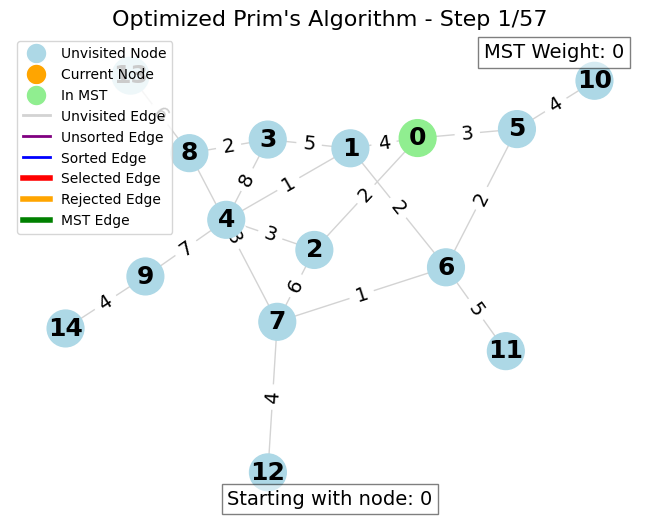

In [ ]:
ani = FuncAnimation(plt.gcf(), update, frames=len(traversal_steps), interval=1500, repeat=True)

ani.save('prims_optimized_algorithm.mp4', writer='ffmpeg', fps=0.7)

## Kruskal's Algorithm

Kruskal's algorithm is a minimum spanning tree algorithm that takes a graph as input and finds the subset of the edges of that graph which form a tree that includes every vertex and has the minimum sum of weights among all the trees that can be formed from the graph

It falls under a class of algorithms called greedy algorithms that find the local optimum in the hopes of finding a global optimum.

We start from the edges with the lowest weight and keep adding edges until we reach our goal.

The steps for implementing Kruskal's algorithm are as follows:

1. Sort all the edges from low weight to high
2. Take the edge with the lowest weight and add it to the spanning tree. If adding the edge created a cycle, then reject this edge.
3. Keep adding edges until we reach all vertices.

In [ ]:
def kruskal(graph):
    edges = []

    for node in graph:
        for neighbor, weight in graph[node].items():
            edges.append((weight, node, neighbor))

    mst = []
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    while edges:
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[0] < min_edge[0]:
                min_edge = edge
        edges.remove(min_edge)

        weight, node1, node2 = min_edge

        if find(parent, node1) != find(parent, node2):
            union_naive(parent, rank, node1, node2)
            mst.append((node1, node2, weight))

    return mst

In [ ]:
def find(parent, node):
    while parent[node] != node:
        node = parent[node]
    return node

In [ ]:
def union_naive(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)

    parent[root2] = root1

In [ ]:
graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

mst = kruskal(graph)

print("Minimum Spanning Tree:")
for edge in mst:
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]}")

Minimum Spanning Tree:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4


The time complexity Of Kruskal's Algorithm is: `O(E log E)`.

**Optimized Kruskal's Algorithm:**

This version of Kruskal's Algorithm is more optimized because:

1. It sorts edges upfront (`edges.sort()`), ensuring efficient iteration. The naive version manually finds the minimum edge repeatedly, adding significant overhead with extra loops.

2. It uses path compression and rank to optimize the union-find operations. The naive version skips these optimizations, leading to slower and more redundant operations as the tree structures grow.


In [ ]:
def kruskal_optimized(graph):
  edges = []
  for node in graph:
    for neighbor, weight in graph[node].items():
      edges.append((weight, node, neighbor))

  edges.sort()

  parent = {node: node for node in graph}
  rank = {node: 0 for node in graph}
  mst = []

  for weight, node1, node2 in edges:
    if find_optimized(parent, node1) != find_optimized(parent, node2):
      union_optimized(parent, rank, node1, node2)
      mst.append((node1, node2, weight))

  return mst

In [ ]:
def find_optimized(parent, node):
  if parent[node] != node:
    parent[node] = find_optimized(parent, parent[node])
  return parent[node]

In [ ]:
def union_optimized(parent, rank, node1, node2):
  root1 = find_optimized(parent, node1)
  root2 = find_optimized(parent, node2)

  if root1 != root2:
    if rank[root1] > rank[root2]:
      parent[root2] = root1
    elif rank[root1] < rank[root2]:
      parent[root1] = root2
    else:
      parent[root2] = root1
      rank[root1] += 1

In [ ]:
graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

mst = kruskal_optimized(graph)

print("Minimum Spanning Tree:")
for edge in mst:
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]}")

Minimum Spanning Tree:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4


**Visualization:**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
graph = {
    '0': {'1': 4, '2': 2, '5': 3},
    '1': {'0': 4, '3': 5, '4': 1, '6': 2},
    '2': {'0': 2, '4': 3, '7': 6},
    '3': {'1': 5, '8': 2},
    '4': {'1': 1, '2': 3, '3': 8, '9': 7},
    '5': {'0': 3, '6': 2, '10': 4},
    '6': {'1': 2, '5': 2, '7': 1, '11': 5},
    '7': {'2': 6, '6': 1, '8': 3, '12': 4},
    '8': {'3': 2, '7': 3, '13': 6},
    '9': {'4': 7, '14': 4},
    '10': {'5': 4},
    '11': {'6': 5},
    '12': {'7': 4},
    '13': {'8': 6},
    '14': {'9': 4},
}

In [ ]:
def find_optimized(parent, node):
    if parent[node] != node:
        parent[node] = find_optimized(parent, parent[node])
    return parent[node]

In [ ]:
def union_optimized(parent, rank, node1, node2):
    root1 = find_optimized(parent, node1)
    root2 = find_optimized(parent, node2)

    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        elif rank[root1] < rank[root2]:
            parent[root1] = root2
        else:
            parent[root2] = root1
            rank[root1] += 1

In [ ]:
def kruskal_optimized_with_steps(graph):
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            if node < neighbor:
                edges.append((weight, node, neighbor))

    steps = []

    steps.append({
        'event': 'initialize',
        'description': 'Initializing Kruskal\'s algorithm',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy(),
        'unsorted': True
    })

    edges.sort()

    steps.append({
        'event': 'sort_edges',
        'description': 'Sorting all edges by weight',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    steps.append({
        'event': 'init_union_find',
        'description': 'Initializing Union-Find data structure',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    mst = []

    for weight, node1, node2 in edges:
        current_edge = (node1, node2, weight)

        steps.append({
            'event': 'check_edge',
            'description': f'Checking edge {node1}→{node2} (weight: {weight})',
            'parent': parent.copy(),
            'rank': rank.copy(),
            'mst': mst.copy(),
            'current_edge': current_edge,
            'all_edges': edges.copy()
        })

        root1 = find_optimized(parent, node1)
        root2 = find_optimized(parent, node2)

        if root1 != root2:
            old_parent = parent.copy()
            old_rank = rank.copy()

            union_optimized(parent, rank, node1, node2)

            mst.append((node1, node2, weight))

            steps.append({
                'event': 'add_to_mst',
                'description': f'Adding edge {node1}→{node2} (weight: {weight}) to MST',
                'old_parent': old_parent,
                'old_rank': old_rank,
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })
        else:
            steps.append({
                'event': 'skip_edge',
                'description': f'Skipping edge {node1}→{node2} - would create a cycle',
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })

    steps.append({
        'event': 'complete',
        'description': 'Kruskal\'s algorithm complete',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': mst.copy(),
        'current_edge': None,
        'all_edges': edges.copy()
    })

    return steps

In [ ]:
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        if node < neighbor:
            G.add_edge(node, neighbor, weight=weight)

traversal_steps = kruskal_optimized_with_steps(graph)

node_colors = {
    'default': 'lightblue',
    'highlighted': 'orange'
}

edge_colors = {
    'default': 'lightgray',
    'mst': 'green',
    'current': 'red',
    'rejected': 'orange',
    'unsorted': 'purple'
}

In [ ]:
def get_connected_components(parent):
    components = {}
    parent_copy = parent.copy()

    for node in parent_copy:
        root = parent_copy[node]
        while root != parent_copy[root]:
            root = parent_copy[root]

        if root not in components:
            components[root] = []
        components[root].append(node)

    return components

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)


<Figure size 1200x800 with 0 Axes>

In [ ]:
def update(frame):
    plt.clf()
    step = traversal_steps[frame]
    event = step['event']

    node_color_map = [node_colors['default'] for _ in G.nodes()]

    if step['current_edge']:
        node1, node2, _ = step['current_edge']
        for i, node in enumerate(G.nodes()):
            if node == node1 or node == node2:
                node_color_map[i] = node_colors['highlighted']

    edge_color_map = []
    edge_width_map = []

    for u, v in G.edges():
        edge = 'default'

        for n1, n2, _ in step.get('mst', []):
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                edge = 'mst'
                break

        if step['current_edge']:
            n1, n2, _ = step['current_edge']
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                if event == 'skip_edge':
                    edge = 'rejected'
                else:
                    edge = 'current'

        if event == 'initialize' and step.get('unsorted', False):
            for weight, n1, n2 in step['all_edges']:
                if (u == n1 and v == n2) or (u == n2 and v == n1):
                    edge = 'unsorted'
                    break

        edge_color_map.append(edge_colors[edge])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)

    nx.draw(G, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    plt.title(f"Kruskal's Algorithm - Step {frame+1}/{len(traversal_steps)}", fontsize=16)
    plt.figtext(0.5, 0.02, step['description'],
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    if event != 'initialize' and step['all_edges']:
        edge_list = []
        displayed_edges = step['all_edges'][:7]
        for weight, src, dest in displayed_edges:
            edge_list.append(f"{src}→{dest} ({weight})")

        edge_text = f"Edges (sorted by weight): {', '.join(edge_list)}"
        if len(step['all_edges']) > 7:
            edge_text += f" + {len(step['all_edges']) - 7} more"

        plt.figtext(0.5, 0.06, edge_text,
                    ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})

    if step['parent']:
        try:
            components = get_connected_components(step['parent'])
            forest_text = "Connected Components: "
            component_strs = []

            for root, members in components.items():
                component_strs.append("[" + ", ".join(sorted(members)) + "]")

            forest_text += ", ".join(component_strs[:3])
            if len(component_strs) > 3:
                forest_text += f" + {len(component_strs) - 3} more"

            plt.figtext(0.5, 0.1, forest_text,
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})
        except Exception as e:
            plt.figtext(0.5, 0.1, "Union-Find structure initialized",
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})

    if step['mst']:
        total_weight = sum(weight for _, _, weight in step['mst'])
        plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                    ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['default'], markersize=15, label='Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['highlighted'], markersize=15, label='Current Nodes'),
        plt.Line2D([0], [0], color=edge_colors['default'], lw=2, label='Regular Edge'),
        plt.Line2D([0], [0], color=edge_colors['unsorted'], lw=2, label='Unsorted Edge'),
        plt.Line2D([0], [0], color=edge_colors['current'], lw=4, label='Current Edge'),
        plt.Line2D([0], [0], color=edge_colors['rejected'], lw=4, label='Creates Cycle'),
        plt.Line2D([0], [0], color=edge_colors['mst'], lw=4, label='MST Edge')
    ]

    plt.legend(handles=legend_elements, loc='upper left')

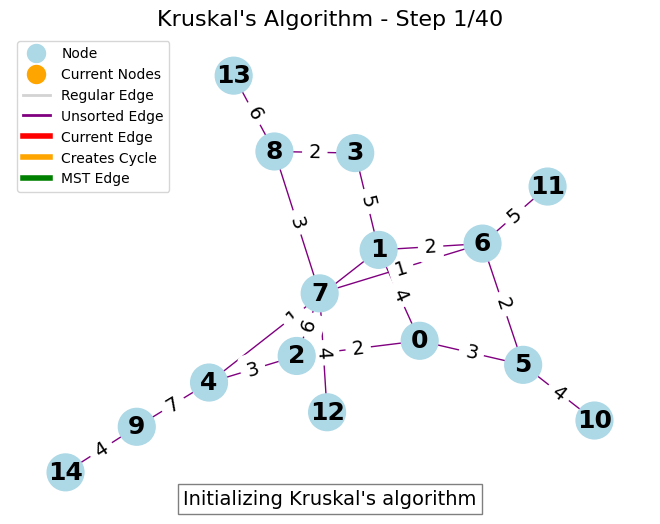

In [ ]:
ani = FuncAnimation(plt.gcf(), update, frames=len(traversal_steps), interval=1500, repeat=True)

ani.save('kruskal_algorithm.mp4', writer='ffmpeg', fps=0.7)

## Analysis

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import tracemalloc
import pandas as pd
from networkx.algorithms.tree import minimum_spanning_tree

In [ ]:
def generate_sparse_graph(n):
    return nx.gnm_random_graph(n, n-1, seed=42)

In [ ]:
def generate_dense_graph(n):
    return nx.gnm_random_graph(n, n*(n-1)//2, seed=42)

In [ ]:
def generate_grid_graph(n):
    side = int(n**0.5)
    G = nx.grid_2d_graph(side, side)
    G = nx.convert_node_labels_to_integers(G)
    return G

In [ ]:
def generate_cycle_graph(n):
    return nx.cycle_graph(n)

In [ ]:
def generate_star_graph(n):
    return nx.star_graph(n-1)

In [ ]:
def generate_complete_graph(n):
    return nx.complete_graph(n)

In [ ]:
def generate_barabasi_graph(n):
    return nx.barabasi_albert_graph(n, max(1, n//10))

In [ ]:
def generate_watts_strogatz_graph(n):
    return nx.watts_strogatz_graph(n, k=4, p=0.3)

In [ ]:
def assign_random_weights(G):
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)
    return G

In [ ]:
def measure_mst_performance(G, algorithm):
    tracemalloc.start()
    start_time = time.perf_counter()
    if algorithm == 'prim':
        mst = minimum_spanning_tree(G, algorithm='prim')
    elif algorithm == 'kruskal':
        mst = minimum_spanning_tree(G, algorithm='kruskal')
    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return (end_time - start_time), peak / 1024  # Return time and memory in KB


In [ ]:
def plot_graph(G, title, ax):
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, ax=ax)
    ax.set_title(title)


        Graph Type  Size  Prim Time (s)  Prim Memory (KB)  Kruskal Time (s)  \
0           Sparse    50       0.005315         46.189453          0.003758   
1            Dense    50       0.017131        156.597656          0.015230   
2             Grid    50       0.002131         34.554688          0.002872   
3            Cycle    50       0.002017         33.960938          0.002577   
4             Star    50       0.001948         35.890625          0.002518   
5         Complete    50       0.009075         69.359375          0.012508   
6         Barabasi    50       0.002247         36.039062          0.004109   
7   Watts-Strogatz    50       0.002067         34.976562          0.003032   
8           Sparse   100       0.003426         68.468750          0.004056   
9            Dense   100       0.082482        521.167969          0.056513   
10            Grid   100       0.003390         74.664062          0.005127   
11           Cycle   100       0.004460         74.3

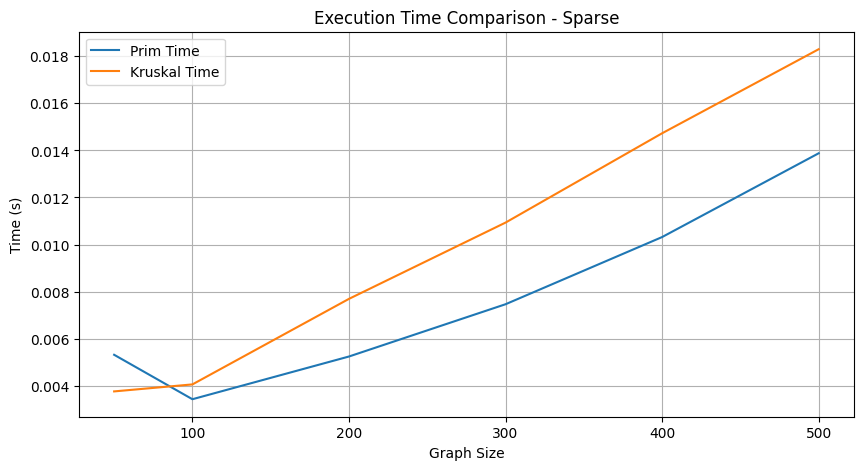

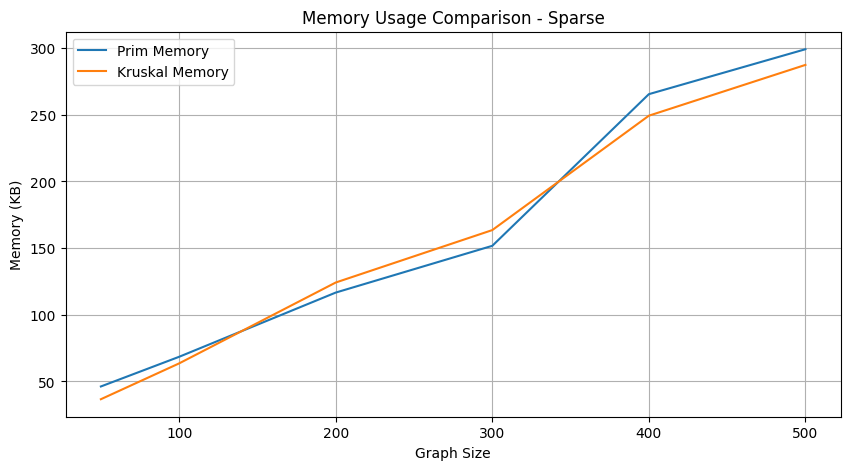

[Time] Kruskal outperforms Prim in Sparse starting from size 50
[Memory] Kruskal uses less memory than Prim in Sparse starting from size 50


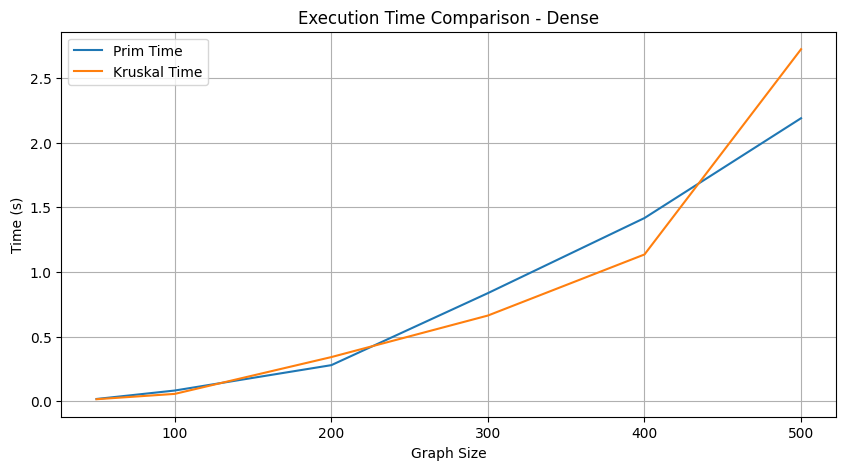

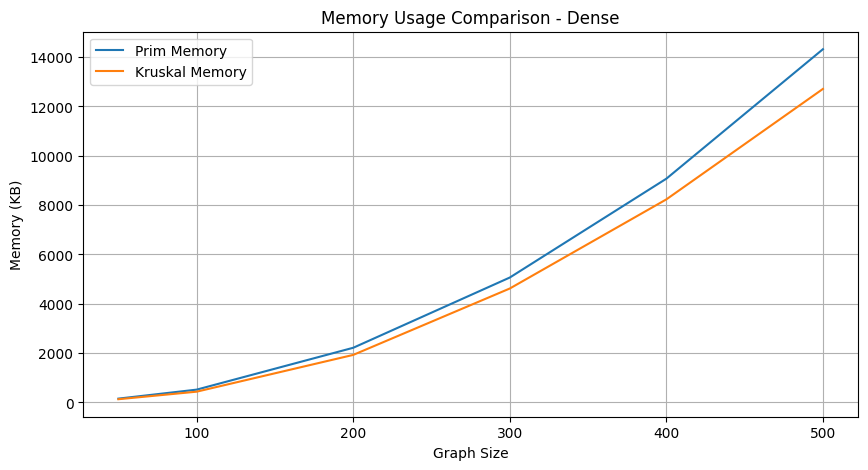

[Time] Kruskal outperforms Prim in Dense starting from size 50
[Memory] Kruskal uses less memory than Prim in Dense starting from size 50


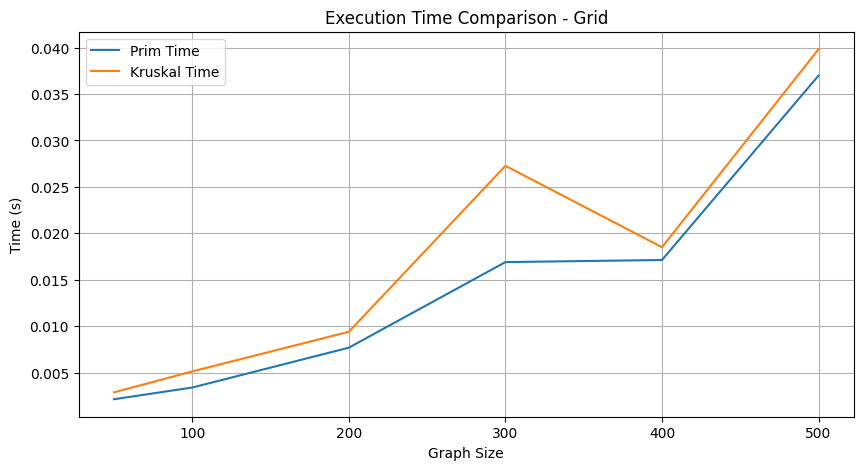

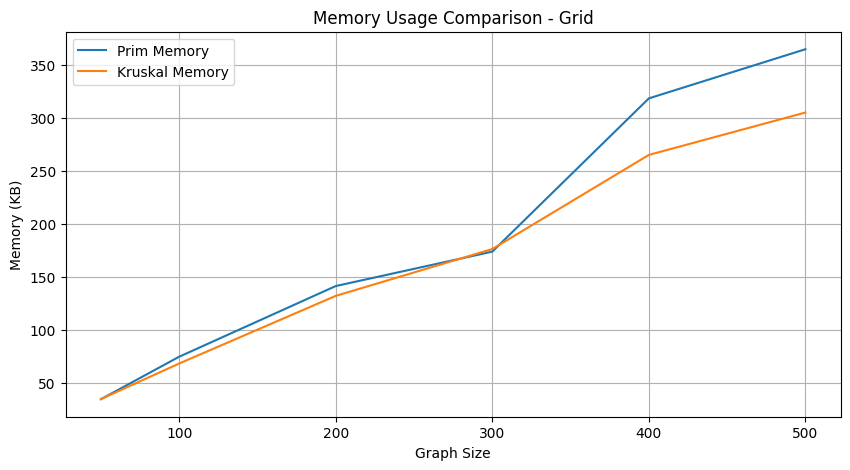

[Memory] Kruskal uses less memory than Prim in Grid starting from size 100


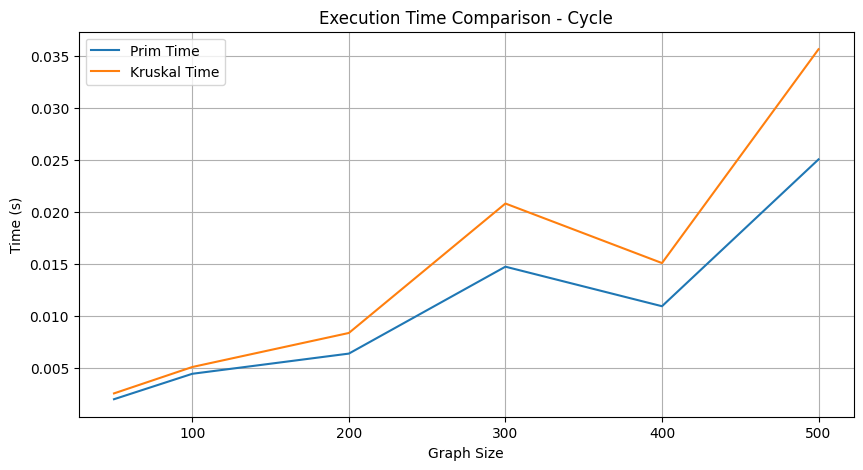

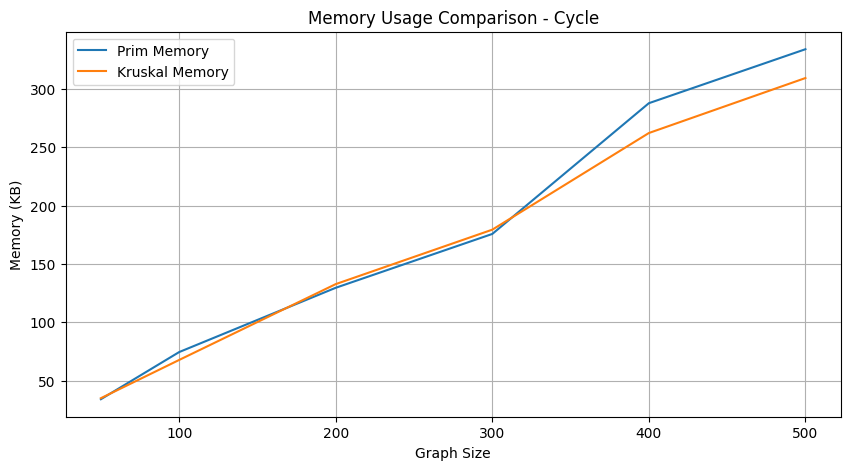

[Memory] Kruskal uses less memory than Prim in Cycle starting from size 100


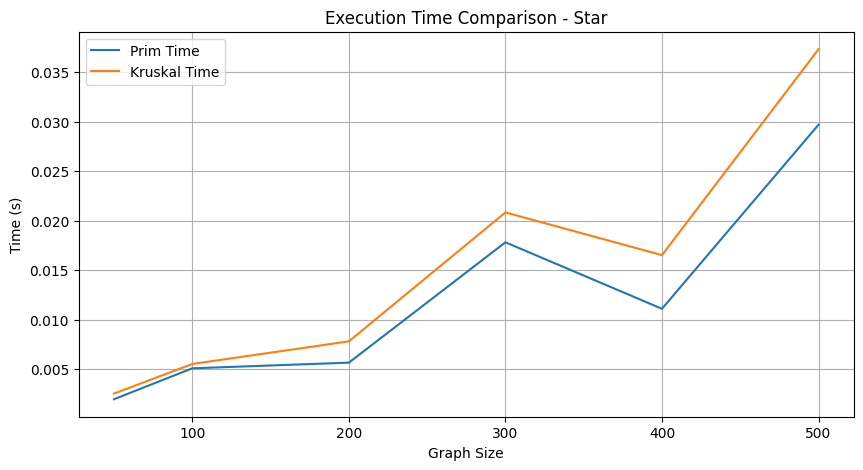

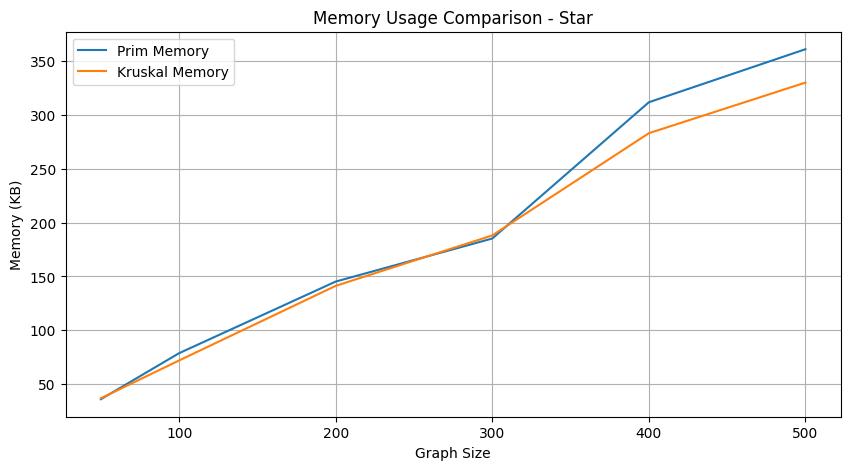

[Memory] Kruskal uses less memory than Prim in Star starting from size 100


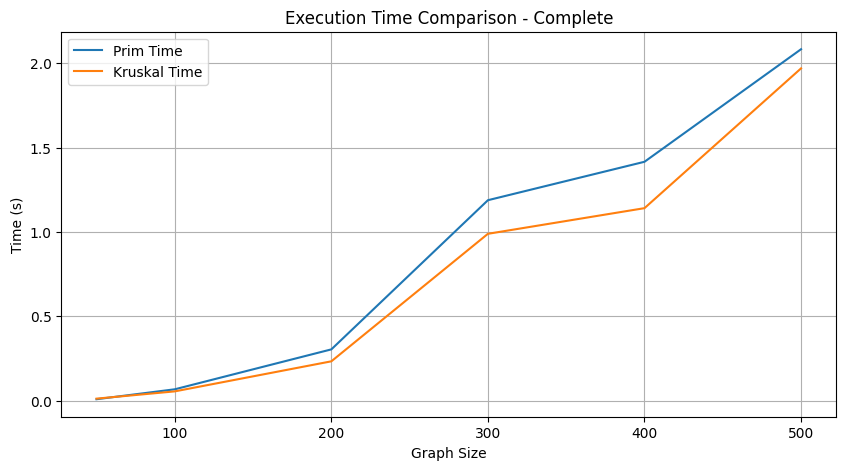

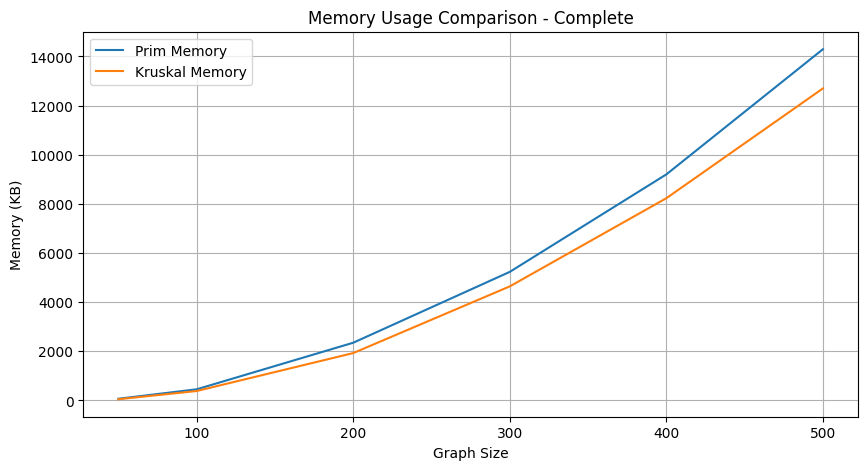

[Time] Kruskal outperforms Prim in Complete starting from size 100
[Memory] Kruskal uses less memory than Prim in Complete starting from size 50


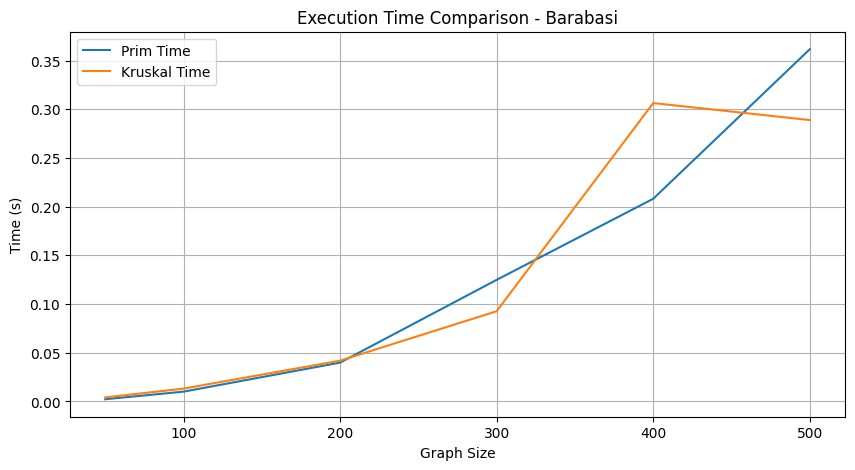

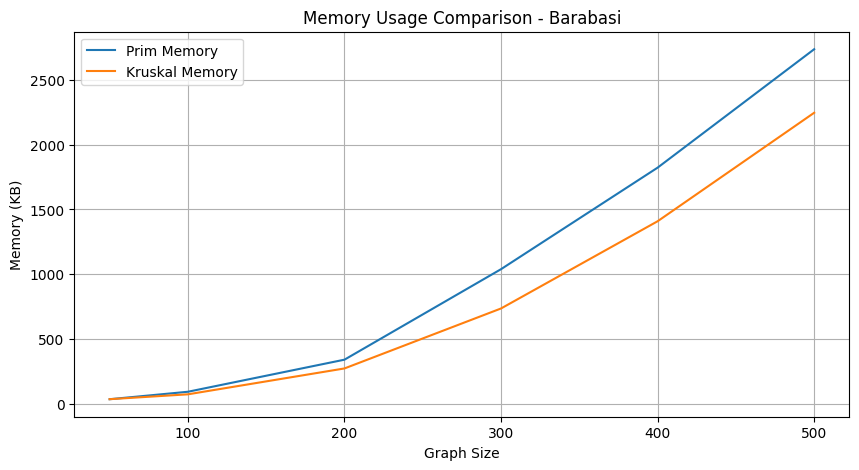

[Time] Kruskal outperforms Prim in Barabasi starting from size 300
[Memory] Kruskal uses less memory than Prim in Barabasi starting from size 100


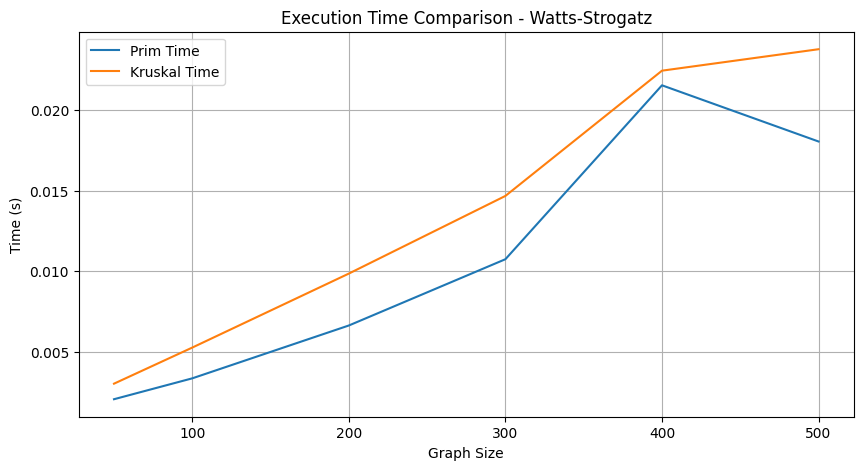

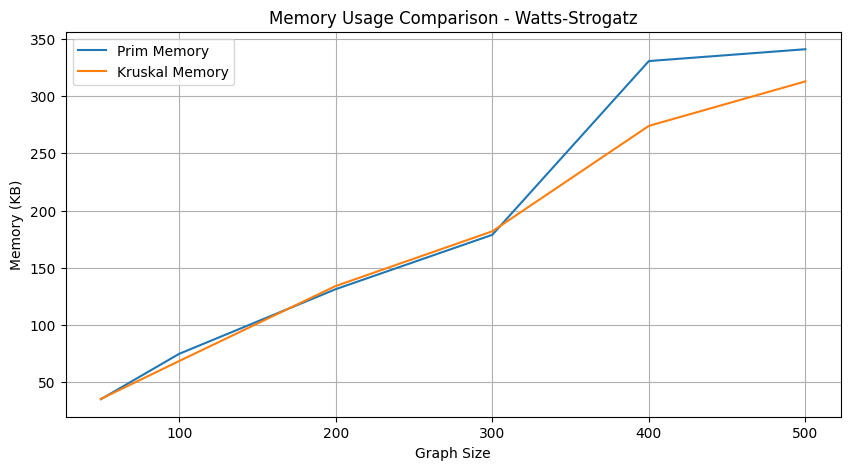

[Memory] Kruskal uses less memory than Prim in Watts-Strogatz starting from size 100


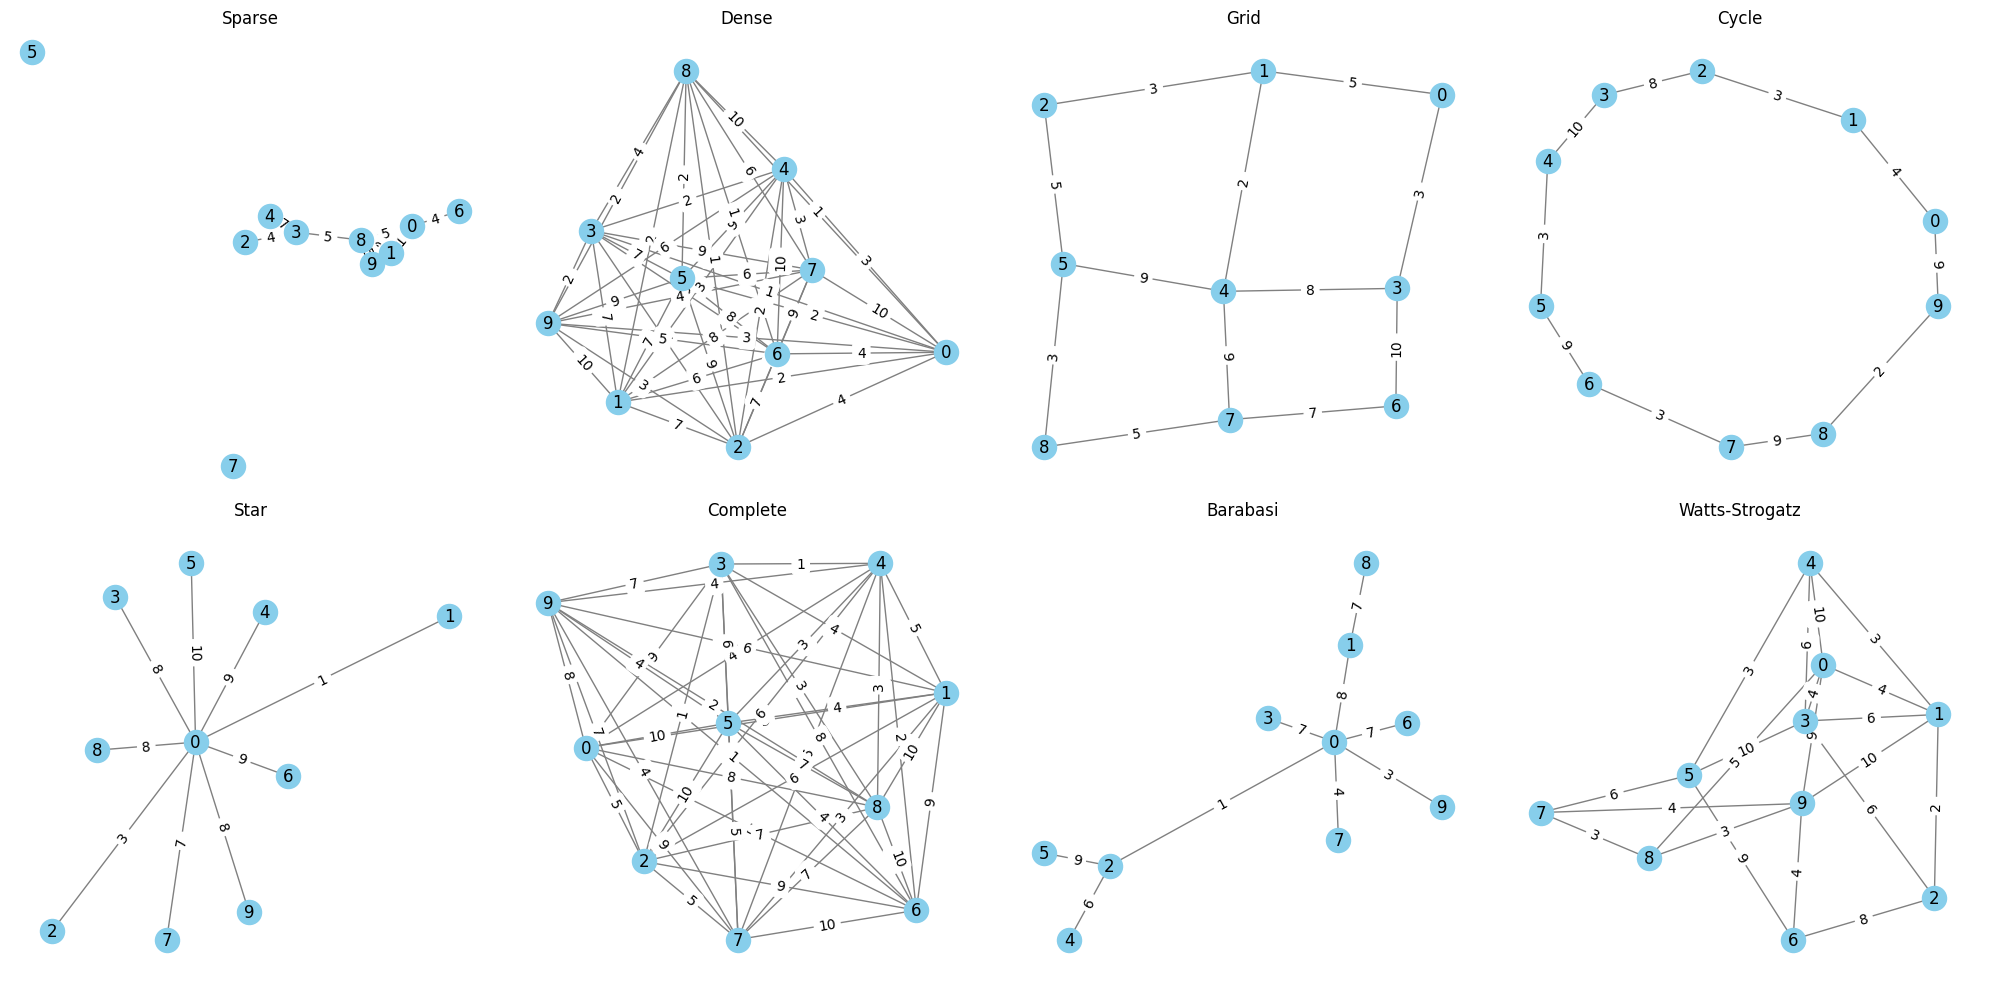

In [ ]:
graph_types = {
    'Sparse': generate_sparse_graph,
    'Dense': generate_dense_graph,
    'Grid': generate_grid_graph,
    'Cycle': generate_cycle_graph,
    'Star': generate_star_graph,
    'Complete': generate_complete_graph,
    'Barabasi': generate_barabasi_graph,
    'Watts-Strogatz': generate_watts_strogatz_graph
}

sizes = [50, 100, 200, 300, 400, 500]

results = []

for size in sizes:
    for graph_name, graph_func in graph_types.items():
        G = graph_func(size)
        G = assign_random_weights(G)
        t_prim, m_prim = measure_mst_performance(G, 'prim')
        t_kruskal, m_kruskal = measure_mst_performance(G, 'kruskal')
        results.append({
            'Graph Type': graph_name,
            'Size': size,
            'Prim Time (s)': t_prim,
            'Prim Memory (KB)': m_prim,
            'Kruskal Time (s)': t_kruskal,
            'Kruskal Memory (KB)': m_kruskal
        })

df = pd.DataFrame(results)
print(df)

for graph_type in df['Graph Type'].unique():
    subdf = df[df['Graph Type'] == graph_type]
    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['Prim Time (s)'], label='Prim Time')
    plt.plot(subdf['Size'], subdf['Kruskal Time (s)'], label='Kruskal Time')
    plt.title(f'Execution Time Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['Prim Memory (KB)'], label='Prim Memory')
    plt.plot(subdf['Size'], subdf['Kruskal Memory (KB)'], label='Kruskal Memory')
    plt.title(f'Memory Usage Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Memory (KB)')
    plt.legend()
    plt.grid(True)
    plt.show()

    better_time = subdf[subdf['Kruskal Time (s)'] < subdf['Prim Time (s)']]
    better_mem = subdf[subdf['Kruskal Memory (KB)'] < subdf['Prim Memory (KB)']]
    if not better_time.empty:
        print(f"[Time] Kruskal outperforms Prim in {graph_type} starting from size {better_time.iloc[0]['Size']}")
    if not better_mem.empty:
        print(f"[Memory] Kruskal uses less memory than Prim in {graph_type} starting from size {better_mem.iloc[0]['Size']}")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, (graph_name, graph_func) in enumerate(graph_types.items()):
    G = graph_func(10)
    G = assign_random_weights(G)
    plot_graph(G, graph_name, axes[idx])

plt.tight_layout()
plt.show()
